In [3]:
from sequenzo import *
import pandas as pd

family_df = pd.read_csv('/Users/lei/Documents/japan_romance/multidomain_algorithm/family_15_35.csv')
happiness_df = pd.read_csv('/Users/lei/Documents/japan_romance/multidomain_algorithm/happiness_15_35.csv')

family_df

,ID,15,16,17,18,19,20,21,22,23,...,26,27,28,29,30,31,32,33,34,35
0,1,1,1,1,1,1,1,2,2,2,...,3,3,3,3,3,3,3,3,3,3
1,2,1,1,1,2,1,2,1,1,1,...,2,2,2,2,2,2,2,2,2,3
2,5,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,6,1,1,2,1,2,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,7,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,1992,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1534,1995,2,2,2,2,2,3,3,3,3,...,3,3,2,3,3,3,3,3,3,3
1535,1996,1,2,2,2,2,1,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1536,1997,1,1,1,1,1,1,2,3,3,...,3,3,3,3,3,3,3,3,3,3


In [4]:
time_cols = []

for i in list(range(15, 36)):
    time_cols.append(str(i))

family_sequence = SequenceData(data=family_df,
                               time_type='age',
                               time=time_cols,
                               states=[1, 2, 3],
                               labels=["Single", "Romantic Partner", "Married"])

happiness_sequence = SequenceData(data=happiness_df,
                                 time_type='age',
                                 time=time_cols,
                                 states=[1, 2, 3, 4, 5],
                                 labels=["Unhappy", "Somewhat unhappy", "Neutral", "Somewhat happy", "Happy"])


[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Min/Max sequence length: 21 / 21
[>] Alphabet: [1, 2, 3]

[>] SequenceData initialized successfully! Here's a summary:
[>] Number of sequences: 1538
[>] Min/Max sequence length: 21 / 21
[>] Alphabet: [1, 2, 3, 4, 5]


In [5]:
distance_matrix_family = get_distance_matrix(seqdata=family_sequence,
                                                     method='OM',
                                                     sm="CONSTANT",
                                                     indel=1)
distance_matrix_family

[>] Processing 1538 sequences with 3 unique states.
  - Creating 4x4 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 859 unique sequences.
[>] Sequence length: min/max = 21 / 21.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,0,1,2,3,4,5,6,7,8,9,...,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537
0,0.0,20.0,34.0,28.0,8.0,6.0,8.0,10.0,8.0,16.0,...,16.0,16.0,12.0,22.0,4.0,30.0,12.0,10.0,6.0,6.0
1,20.0,0.0,20.0,20.0,22.0,26.0,14.0,16.0,12.0,16.0,...,12.0,8.0,12.0,18.0,20.0,24.0,28.0,30.0,26.0,24.0
2,34.0,20.0,0.0,36.0,42.0,34.0,34.0,34.0,30.0,32.0,...,18.0,20.0,22.0,34.0,38.0,42.0,30.0,34.0,40.0,36.0
3,28.0,20.0,36.0,0.0,24.0,32.0,22.0,18.0,24.0,16.0,...,28.0,26.0,28.0,6.0,24.0,6.0,36.0,32.0,28.0,28.0
4,8.0,22.0,42.0,24.0,0.0,12.0,10.0,12.0,12.0,16.0,...,24.0,22.0,20.0,24.0,4.0,24.0,18.0,14.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,30.0,24.0,42.0,6.0,24.0,36.0,22.0,20.0,26.0,18.0,...,32.0,28.0,32.0,8.0,26.0,0.0,42.0,38.0,30.0,30.0
1534,12.0,28.0,30.0,36.0,18.0,6.0,20.0,22.0,16.0,24.0,...,22.0,24.0,18.0,34.0,16.0,42.0,0.0,4.0,12.0,12.0
1535,10.0,30.0,34.0,32.0,14.0,4.0,18.0,20.0,18.0,24.0,...,22.0,26.0,18.0,30.0,14.0,38.0,4.0,0.0,10.0,10.0
1536,6.0,26.0,40.0,28.0,6.0,6.0,14.0,16.0,14.0,20.0,...,22.0,22.0,18.0,28.0,6.0,30.0,12.0,10.0,0.0,4.0


In [6]:
distance_matrix_happiness = get_distance_matrix(seqdata=happiness_sequence,
                                                     method='OM',
                                                     sm="CONSTANT",
                                                     indel=1)
distance_matrix_happiness

[>] Processing 1538 sequences with 5 unique states.
  - Creating 6x6 substitution-cost matrix using 2 as constant value
[>] Indel cost generated.

[>] Identified 895 unique sequences.
[>] Sequence length: min/max = 21 / 21.

[>] Starting Optimal Matching(OM)...
[>] Computing all pairwise distances...
[>] Computed Successfully.


,0,1,2,3,4,5,6,7,8,9,...,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537
0,0.0,32.0,16.0,38.0,42.0,38.0,10.0,32.0,16.0,10.0,...,10.0,32.0,30.0,2.0,6.0,42.0,22.0,22.0,28.0,32.0
1,32.0,0.0,28.0,14.0,14.0,20.0,36.0,32.0,32.0,38.0,...,34.0,32.0,8.0,34.0,32.0,14.0,28.0,28.0,28.0,32.0
2,16.0,28.0,0.0,36.0,40.0,34.0,16.0,28.0,22.0,16.0,...,14.0,28.0,32.0,16.0,16.0,40.0,14.0,18.0,24.0,28.0
3,38.0,14.0,36.0,0.0,12.0,18.0,40.0,34.0,38.0,42.0,...,38.0,38.0,14.0,38.0,38.0,12.0,30.0,38.0,32.0,30.0
4,42.0,14.0,40.0,12.0,0.0,24.0,42.0,42.0,42.0,42.0,...,38.0,42.0,14.0,42.0,42.0,0.0,38.0,42.0,36.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,42.0,14.0,40.0,12.0,0.0,24.0,42.0,42.0,42.0,42.0,...,38.0,42.0,14.0,42.0,42.0,0.0,38.0,42.0,36.0,38.0
1534,22.0,28.0,14.0,30.0,38.0,26.0,20.0,32.0,26.0,22.0,...,20.0,34.0,32.0,22.0,22.0,38.0,0.0,24.0,28.0,32.0
1535,22.0,28.0,18.0,38.0,42.0,36.0,30.0,16.0,16.0,32.0,...,32.0,14.0,28.0,24.0,20.0,42.0,24.0,0.0,10.0,26.0
1536,28.0,28.0,24.0,32.0,36.0,30.0,36.0,16.0,16.0,38.0,...,34.0,14.0,32.0,30.0,22.0,36.0,28.0,10.0,0.0,22.0


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def cmdscale(D):
    # Number of points
    n = len(D)

    # Centering matrix
    H = np.eye(n) - np.ones((n, n)) / n

    # Double centered distance matrix
    B = -0.5 * H @ (D ** 2) @ H

    # Eigendecomposition
    eigvals, eigvecs = np.linalg.eigh(B)

    # Sort descending
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]

    # Keep only positive eigvals
    w_positive = eigvals > 0
    L = np.diag(np.sqrt(eigvals[w_positive]))
    V = eigvecs[:, w_positive]

    # Coordinates
    X = V @ L

    return X, eigvals


In [8]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np

def find_mds_knee_point(cum_explained, title='MDS Dimensionality Selection'):
    """
    自动寻找 MDS 的最佳维度数（膝点）并绘图。
    
    参数:
        cum_explained (list or np.ndarray): 累积解释方差（cumulative explained variance）
        title (str): 图表标题
    
    返回:
        knee (int): 膝点对应的维度数
    """
    # 构造维度索引，从1开始
    dimensions = list(range(1, len(cum_explained) + 1))

    # 使用 KneeLocator 找膝点
    knee_finder = KneeLocator(dimensions, cum_explained, curve='concave', direction='increasing')
    knee = knee_finder.knee

    # 画图
    plt.figure(figsize=(8, 5))
    plt.plot(dimensions, cum_explained, marker='o', label='Cumulative explained variance')
    if knee is not None:
        plt.axvline(knee, color='r', linestyle='--', label=f'Knee at {knee}')
    plt.xlabel('Number of dimensions')
    plt.ylabel('Cumulative explained variance')
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

    return knee


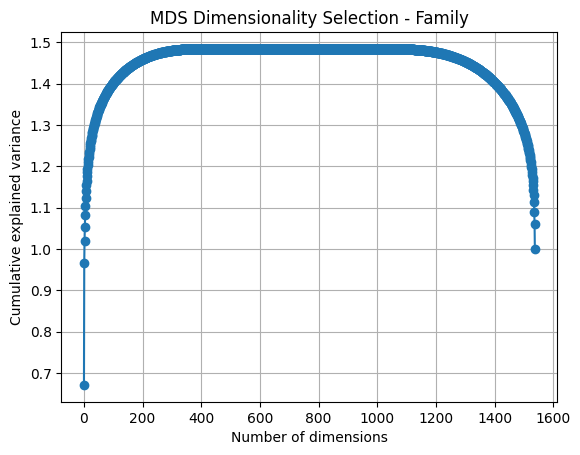

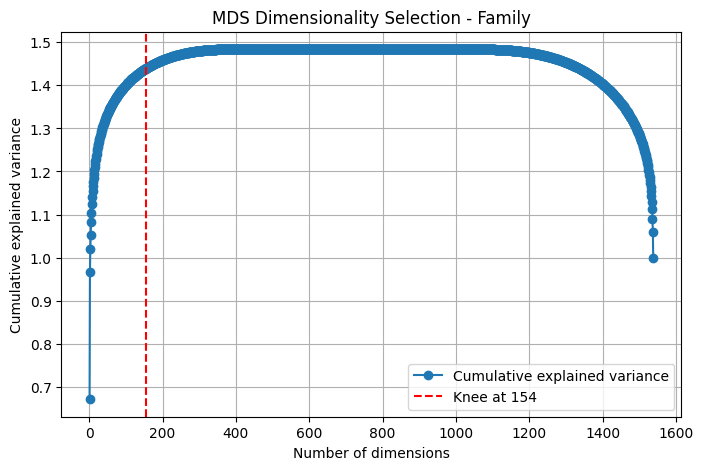

Optimal number of dimensions: 154


In [9]:
X, eigvals = cmdscale(distance_matrix_family)

explained_ratio = eigvals / eigvals.sum()
cum_explained = np.cumsum(explained_ratio)

plt.plot(cum_explained, marker='o')
plt.xlabel('Number of dimensions')
plt.ylabel('Cumulative explained variance')
plt.title('MDS Dimensionality Selection - Family')
plt.grid(True)
plt.show()

knee = find_mds_knee_point(cum_explained, title='MDS Dimensionality Selection - Family')
print(f"Optimal number of dimensions: {knee}")

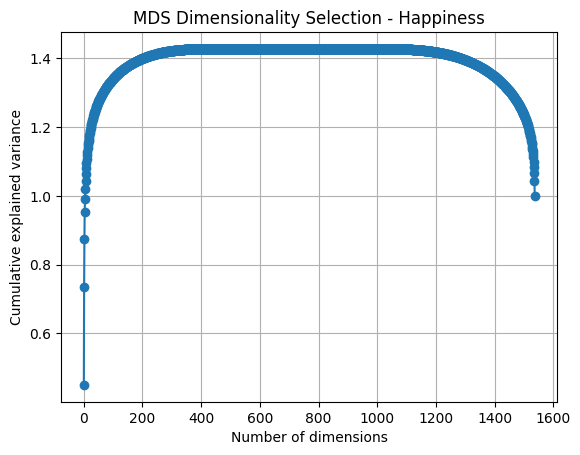

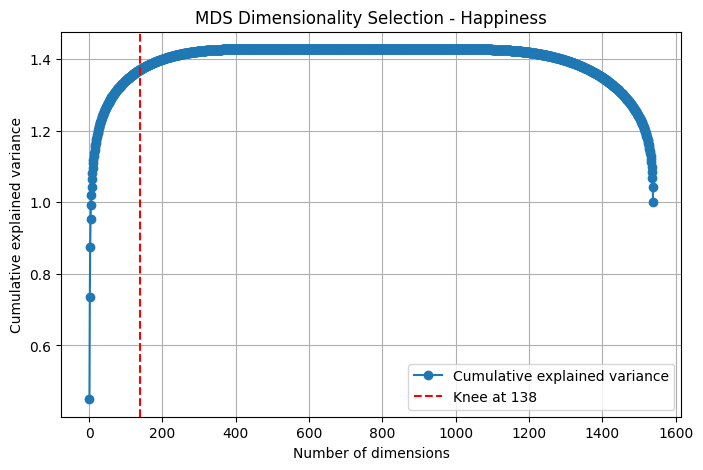

Optimal number of dimensions: 138


In [10]:
X, eigvals = cmdscale(distance_matrix_happiness)

explained_ratio = eigvals / eigvals.sum()
cum_explained = np.cumsum(explained_ratio)

plt.plot(cum_explained, marker='o')
plt.xlabel('Number of dimensions')
plt.ylabel('Cumulative explained variance')
plt.title('MDS Dimensionality Selection - Happiness')
plt.grid(True)
plt.show()

knee = find_mds_knee_point(cum_explained, title='MDS Dimensionality Selection - Happiness')
print(f"Optimal number of dimensions: {knee}")


In [11]:
from kneed import KneeLocator
import matplotlib.pyplot as plt
import numpy as np

def find_optimal_mds_dimension(cum_explained, title='MDS Dimensionality Selection', var_threshold=0.95, max_dim=100, plot=True):
    """
    自动寻找 MDS 的最佳维度数（综合膝点、解释方差阈值、最大维度限制）。
    
    参数:
        cum_explained (list or np.ndarray): 累积解释方差（cumulative explained variance）
        title (str): 图表标题
        var_threshold (float): 累积解释方差阈值（如0.95表示95%）
        max_dim (int): 最大允许的维度数
        plot (bool): 是否绘图

    返回:
        dict:
            - 'knee': 膝点对应维度
            - 'var_cutoff': 达到解释方差阈值的维度
            - 'recommended': 综合考虑后的最终推荐维度
    """
    dimensions = list(range(1, len(cum_explained) + 1))

    # 1. 膝点检测
    knee_finder = KneeLocator(dimensions, cum_explained, curve='concave', direction='increasing')
    knee = knee_finder.knee or len(cum_explained)  # fallback if no knee found

    # 2. 解释方差阈值点
    var_cutoff = np.argmax(cum_explained >= var_threshold) + 1 if np.any(cum_explained >= var_threshold) else len(cum_explained)

    # 3. 综合推荐维度
    recommended = min(knee, var_cutoff, max_dim)

    # 4. 绘图
    if plot:
        plt.figure(figsize=(8, 5))
        plt.plot(dimensions, cum_explained, marker='o', label='Cumulative explained variance')
        plt.axvline(knee, color='red', linestyle='--', label=f'Knee at {knee}')
        plt.axvline(var_cutoff, color='blue', linestyle='--', label=f'{int(var_threshold*100)}% Var at {var_cutoff}')
        plt.axvline(recommended, color='green', linestyle='-', label=f'Recommended: {recommended}', linewidth=2)
        plt.xlabel('Number of dimensions')
        plt.ylabel('Cumulative explained variance')
        plt.title(title)
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return {
        'knee': knee,
        'var_cutoff': var_cutoff,
        'recommended': recommended
    }


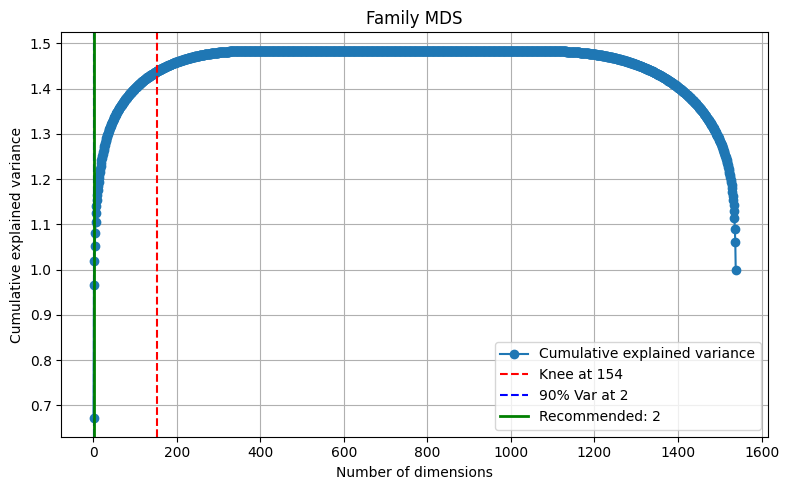

最终推荐维度（Family）： 154


In [23]:
# MDS 处理
X_family, eigvals_family = cmdscale(distance_matrix_family)

# 计算解释方差
explained_ratio = eigvals_family / eigvals_family.sum()
cum_explained = np.cumsum(explained_ratio)

# 自动选择维度
result_family = find_optimal_mds_dimension(
    cum_explained,
    title='Family MDS',
    var_threshold=0.90,
    max_dim=100
)

optimal_dim_family = result_family['recommended']
print("最终推荐维度（Family）：", 154)

# 获取最终嵌入矩阵
X_family_optimal = X_family[:, :optimal_dim_family]


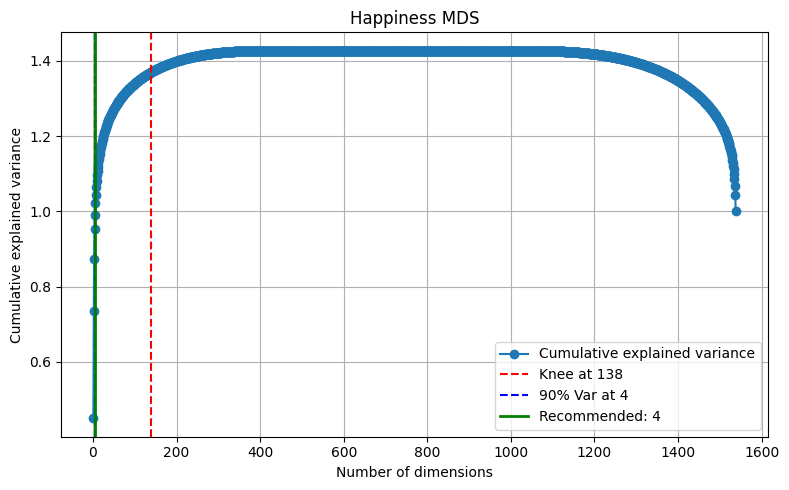

最终推荐维度（Happiness）： 2


In [24]:
# MDS 处理
X_family, eigvals_family = cmdscale(distance_matrix_happiness)

# 计算解释方差
explained_ratio = eigvals_family / eigvals_family.sum()
cum_explained = np.cumsum(explained_ratio)

# 自动选择维度
result_happiness= find_optimal_mds_dimension(
    cum_explained,
    title='Happiness MDS',
    var_threshold=0.90,
    max_dim=100
)

optimal_dim_happiness = result_family['recommended']
print("最终推荐维度（Happiness）：", optimal_dim_happiness)

# 获取最终嵌入矩阵
X_happiness_optimal = X_family[:, :138]


## Cluster analysis

In [14]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

def run_gmm_clustering(X, max_clusters=10, plot=True, random_state=42):
    """
    对嵌入后的多域序列进行 GMM 聚类，并返回最佳聚类结果（根据 BIC）。

    参数:
        X (ndarray): 输入特征 (通常是 MDS 后的低维空间)
        max_clusters (int): 最大聚类数尝试值
        plot (bool): 是否画出 BIC 评估图
        random_state (int): 随机种子

    返回:
        best_gmm (GaussianMixture): 最佳模型
        best_labels (ndarray): 最佳模型下的聚类标签
        best_n_components (int): 最佳聚类数
    """
    bics = []
    models = []

    for n in range(1, max_clusters + 1):
        gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=random_state)
        gmm.fit(X)
        bics.append(gmm.bic(X))
        models.append(gmm)

    best_idx = np.argmin(bics)
    best_gmm = models[best_idx]
    best_labels = best_gmm.predict(X)
    best_n_components = best_idx + 1

    if plot:
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, max_clusters + 1), bics, marker='o')
        plt.axvline(best_n_components, color='red', linestyle='--', label=f'Best n = {best_n_components}')
        plt.xlabel('Number of clusters')
        plt.ylabel('BIC')
        plt.title('GMM Model Selection via BIC')
        plt.legend()
        plt.grid(True)
        plt.show()

    return best_gmm, best_labels, best_n_components


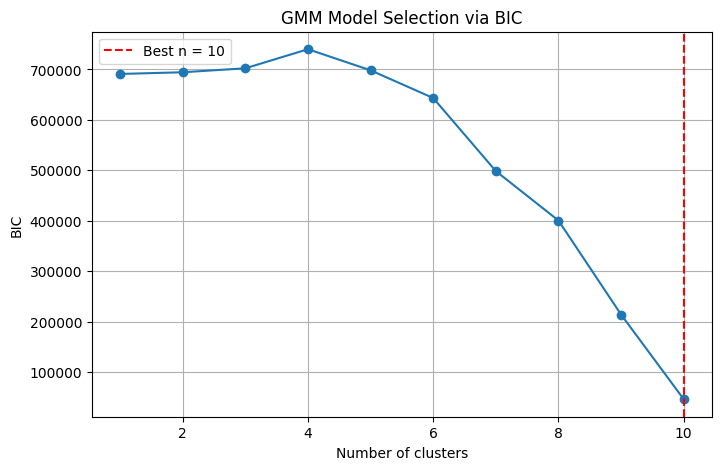

In [25]:
X_concat = np.hstack([X_family_optimal, X_happiness_optimal])
gmm_model, labels, n_clusters = run_gmm_clustering(X_concat)

In [16]:
from sklearn.mixture import GaussianMixture

def fit_final_gmm(X, n_clusters, random_state=42):
    """
    拟合最终的 GMM 模型，返回模型、标签、以及 soft assignment 概率矩阵。
    
    参数:
        X (np.ndarray): 输入特征（建议是连接后的 MDS 嵌入）
        n_clusters (int): 最佳聚类数
        random_state (int): 随机种子，确保可重复性

    返回:
        gmm (GaussianMixture): 拟合后的模型
        labels (np.ndarray): 每个样本的软标签（最大概率所属类别）
        probs (np.ndarray): 每个样本属于各类的概率
    """
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=random_state)
    gmm.fit(X)
    labels = gmm.predict(X)
    probs = gmm.predict_proba(X)
    return gmm, labels, probs


PCA 后维度： 54


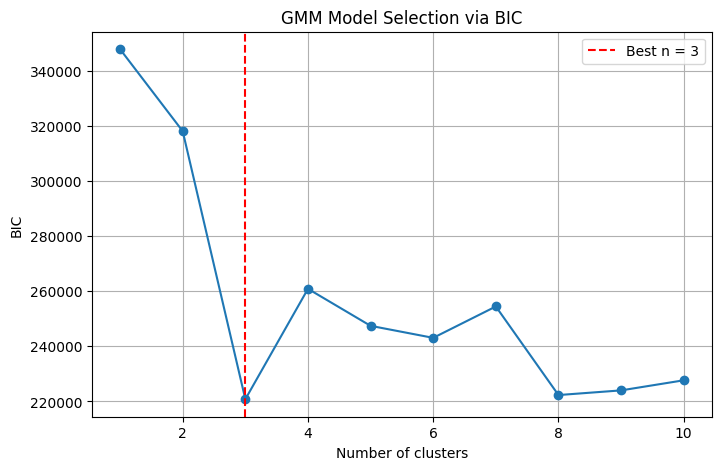

In [38]:
from sklearn.decomposition import PCA

# 拼接后高维
X_concat = np.hstack([X_family_optimal, X_happiness_optimal])

# 尝试保留 95% 方差
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_concat)

print("PCA 后维度：", X_pca.shape[1])

# 然后再 GMM 聚类
gmm_model, gmm_labels, n_clusters = run_gmm_clustering(X_pca)


In [18]:
import pandas as pd
import numpy as np

def get_gmm_cluster_memberships(entity_ids, gmm_labels, gmm_probs=None) -> pd.DataFrame:
    """
    输出每个实体的聚类结果，包括硬聚类标签和（可选）软聚类概率。

    参数:
        entity_ids (list or np.ndarray): 个体 ID 列表，长度应与聚类结果一致。
        gmm_labels (list or np.ndarray): GMM 模型的硬聚类标签（如 model.predict(X)）。
        gmm_probs (np.ndarray, optional): GMM 模型的软概率矩阵（如 model.predict_proba(X)），shape=(n_samples, n_clusters)

    返回:
        pd.DataFrame: 包含 Entity ID、Cluster ID（硬聚类标签）、及每类概率（可选） 的表格。
    """
    df = pd.DataFrame({
        "Entity ID": entity_ids,
        "Cluster ID": gmm_labels
    })

    if gmm_probs is not None:
        prob_df = pd.DataFrame(gmm_probs, columns=[f"P(cluster_{i})" for i in range(gmm_probs.shape[1])])
        df = pd.concat([df, prob_df], axis=1)

    return df


In [39]:
entity_ids = np.arange(X_concat.shape[0])  # 或者你自己的人口ID，比如 df['ID']
results_df = get_gmm_cluster_memberships(family_df['ID'], gmm_labels)
print(results_df.head())


   Entity ID  Cluster ID
0          1           0
1          2           2
2          5           0
3          6           2
4          7           1


In [40]:
hard_cluster_membership_df = results_df[['Entity ID', 'Cluster ID']]
hard_cluster_membership_df = hard_cluster_membership_df.rename({'Entity ID': 'ID'})
hard_cluster_membership_df

,Entity ID,Cluster ID
0,1,0
1,2,2
2,5,0
3,6,2
4,7,1
...,...,...
1533,1992,1
1534,1995,2
1535,1996,0
1536,1997,0


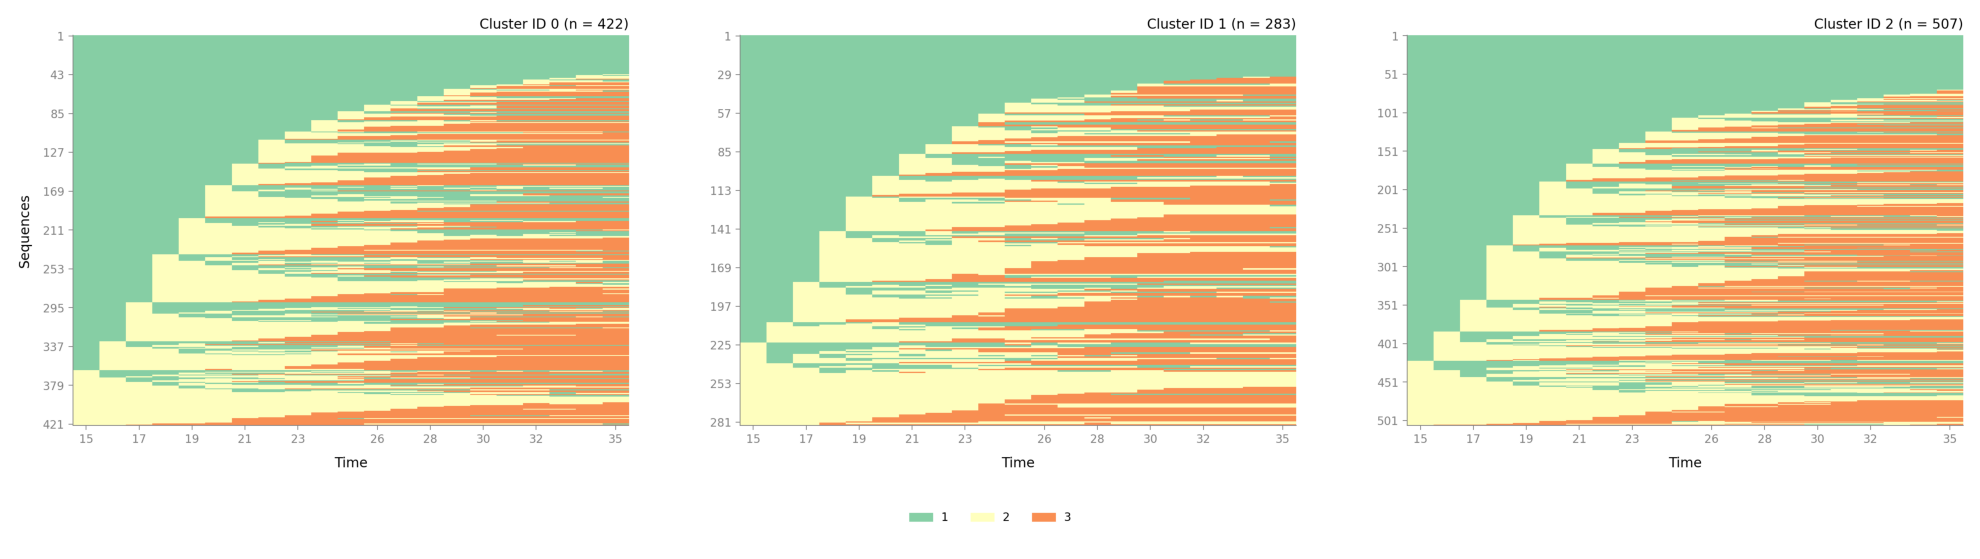

In [41]:
plot_sequence_index(seqdata=family_sequence,
                    id_group_df=hard_cluster_membership_df,
                    categories='Cluster ID',
                    save_as='cluster_index_plot_family')

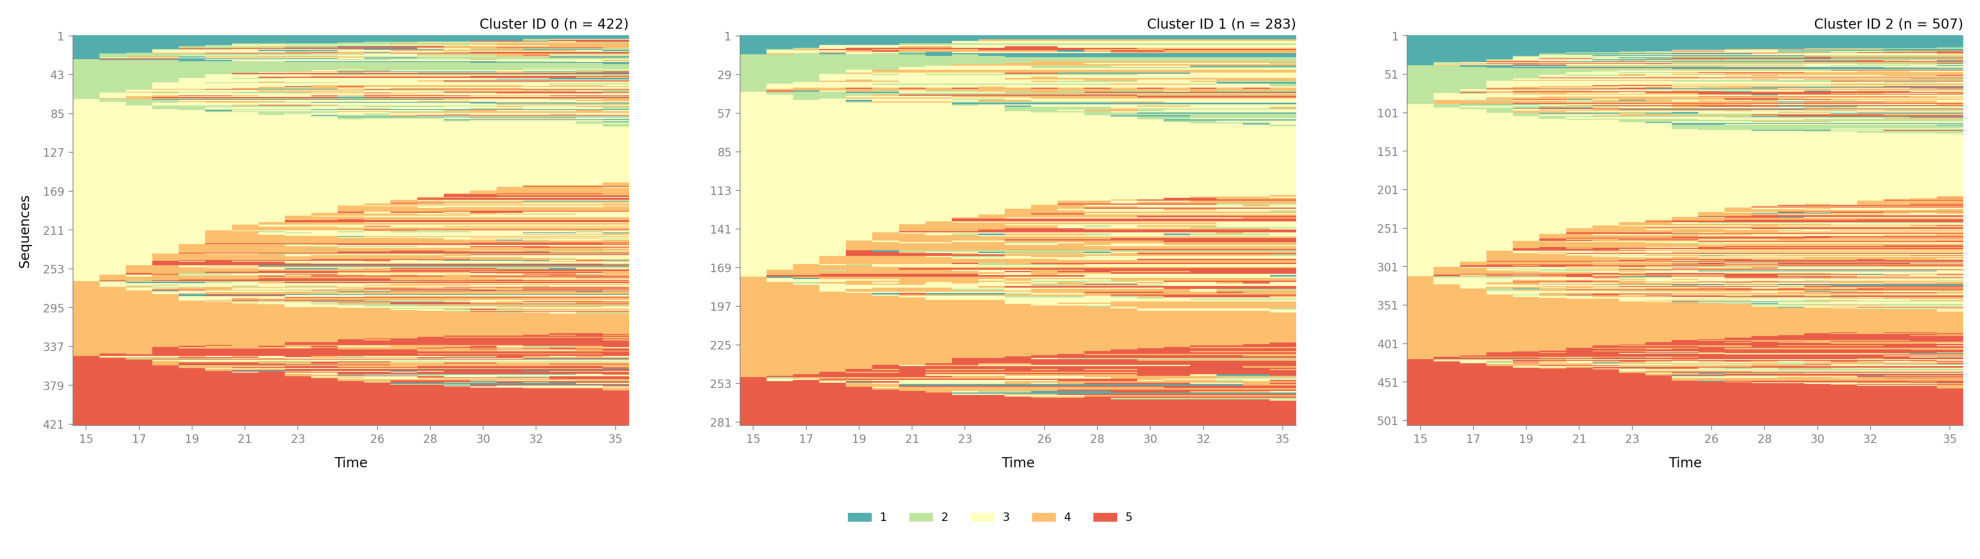

In [42]:
plot_sequence_index(seqdata=happiness_sequence,
                    id_group_df=hard_cluster_membership_df,
                    categories='Cluster ID',
                    save_as='cluster_index_plot_happiness')